**Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

#
%matplotlib inline 
#

Read the data

In [2]:
data = pd.read_csv("Heart_Disease.csv")

In [3]:
print(data.dtypes)

id                           int64
Age                        float64
Gender                      object
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
work_type                   object
smoking_status              object
Heart Disease               object
dtype: object


In [4]:
data.describe()

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,264.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,135.500000,54.424242,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,78.086491,9.183488,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,1.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,68.250000,47.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,135.500000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,202.750000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,270.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [5]:
data.head() # display first 5 rows

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


**draw some plots**

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      264 non-null    float64
 2   Gender                   264 non-null    object 
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  work_type                2

In [7]:
# select numerical columns
data_numeric = data.select_dtypes(include=['int64', 'float64'])

# select categorical columns
data_categorical = data.select_dtypes(include=['object'])

In [8]:
# calculate mean for each column
imputer = SimpleImputer(strategy='mean')

# replace nulls with mean
data_numeric = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)


print(data_numeric)

        id   Age  Chest pain type     BP  Cholesterol  FBS over 120   
0      1.0  70.0              4.0  130.0        322.0           0.0  \
1      2.0  67.0              3.0  115.0        564.0           0.0   
2      3.0  57.0              2.0  124.0        261.0           0.0   
3      4.0  64.0              4.0  128.0        263.0           0.0   
4      5.0  74.0              2.0  120.0        269.0           0.0   
..     ...   ...              ...    ...          ...           ...   
265  266.0  52.0              3.0  172.0        199.0           1.0   
266  267.0  44.0              2.0  120.0        263.0           0.0   
267  268.0  56.0              2.0  140.0        294.0           0.0   
268  269.0  57.0              4.0  140.0        192.0           0.0   
269  270.0  67.0              4.0  160.0        286.0           0.0   

     EKG results  Max HR  Exercise angina  ST depression  Slope of ST   
0            2.0   109.0              0.0            2.4          2.0  \
1

In [9]:
data_numeric.isnull().sum()

id                         0
Age                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
dtype: int64

In [10]:
# calculate mode for each column
imputer = SimpleImputer(strategy='most_frequent')

# replace nulls with mode
data_categorical = pd.DataFrame(imputer.fit_transform(data_categorical), columns=data_categorical.columns)

# print the imputed dataframe
print(data_categorical)

     Gender      work_type   smoking_status Heart Disease
0    Female        Private  formerly smoked           Yes
1      Male  Self-employed     never smoked            No
2    Female        Private     never smoked           Yes
3    Female        Private           smokes            No
4      Male  Self-employed     never smoked            No
..      ...            ...              ...           ...
265  Female        Private           smokes            No
266  Female        Private     never smoked            No
267    Male       Govt_job           smokes            No
268  Female  Self-employed           smokes            No
269  Female        Private          Unknown           Yes

[270 rows x 4 columns]


In [11]:
data_categorical.isnull().sum()

Gender            0
work_type         0
smoking_status    0
Heart Disease     0
dtype: int64

In [12]:
print (data.duplicated().sum())

0


In [13]:
data = pd.concat([data_numeric, data_categorical], axis = 1)

In [14]:

data.head()

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Gender,work_type,smoking_status,Heart Disease
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,Female,Private,formerly smoked,Yes
1,2.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,Male,Self-employed,never smoked,No
2,3.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,Female,Private,never smoked,Yes
3,4.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,Female,Private,smokes,No
4,5.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,Male,Self-employed,never smoked,No


In [15]:

one_hot = pd.get_dummies(data['smoking_status'], prefix='smoking_status')
data = pd.concat([data, one_hot], axis=1)

one_hot = pd.get_dummies(data['work_type'], prefix='work_type')
data = pd.concat([data, one_hot], axis=1)

one_hot = pd.get_dummies(data['Gender'], prefix='Gender')
data = pd.concat([data, one_hot], axis=1)

one_hot = pd.get_dummies(data['Heart Disease'], prefix='Heart Disease')
data = pd.concat([data, one_hot], axis=1)

# concatenate the one-hot encoded dataframe with the original dataframe


In [16]:
data.head()

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Gender_Female,Gender_Male,Heart Disease_No,Heart Disease_Yes
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,...,False,False,False,True,False,False,True,False,False,True
1,2.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,...,False,False,False,False,True,False,False,True,True,False
2,3.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,...,False,False,False,True,False,False,True,False,False,True
3,4.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,...,True,False,False,True,False,False,True,False,True,False
4,5.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,...,False,False,False,False,True,False,False,True,True,False


In [17]:
# delete old
data.pop('Gender')
data.pop('work_type')
data.pop('smoking_status')
data.pop('Heart Disease')

0      Yes
1       No
2      Yes
3       No
4       No
      ... 
265     No
266     No
267     No
268     No
269    Yes
Name: Heart Disease, Length: 270, dtype: object

In [18]:
data.head()

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Gender_Female,Gender_Male,Heart Disease_No,Heart Disease_Yes
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,...,False,False,False,True,False,False,True,False,False,True
1,2.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,...,False,False,False,False,True,False,False,True,True,False
2,3.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,...,False,False,False,True,False,False,True,False,False,True
3,4.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,...,True,False,False,True,False,False,True,False,True,False
4,5.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,...,False,False,False,False,True,False,False,True,True,False


In [19]:
data.head(10)

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Gender_Female,Gender_Male,Heart Disease_No,Heart Disease_Yes
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,...,False,False,False,True,False,False,True,False,False,True
1,2.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,...,False,False,False,False,True,False,False,True,True,False
2,3.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,...,False,False,False,True,False,False,True,False,False,True
3,4.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,...,True,False,False,True,False,False,True,False,True,False
4,5.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,...,False,False,False,False,True,False,False,True,True,False
5,6.0,65.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,...,False,False,False,True,False,False,True,False,True,False
6,7.0,56.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,...,False,False,False,True,False,False,True,False,False,True
7,8.0,59.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,...,False,False,False,True,False,False,True,False,False,True
8,9.0,60.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,...,False,False,False,True,False,False,True,False,False,True
9,10.0,63.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,...,False,False,False,True,False,False,False,True,False,True


**Rescaling the data**

In [20]:
# X_scaled = (X - X_min) / (X_max - X_min)
#rescaling the data from 0 to 1     to have the same weight effect 
scaler = MinMaxScaler()
data[["Age", 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']] = scaler.fit_transform(data[["Age", 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']])

In [21]:
data.head()

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,...,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Gender_Female,Gender_Male,Heart Disease_No,Heart Disease_Yes
0,1.0,0.854167,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,...,False,False,False,True,False,False,True,False,False,True
1,2.0,0.791667,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,...,False,False,False,False,True,False,False,True,True,False
2,3.0,0.583333,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,...,False,False,False,True,False,False,True,False,False,True
3,4.0,0.729167,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,...,True,False,False,True,False,False,True,False,True,False
4,5.0,0.937500,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,...,False,False,False,False,True,False,False,True,True,False


<Axes: >

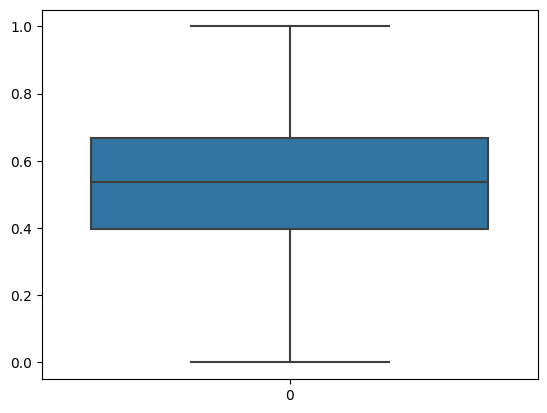

In [22]:
sns.boxplot(data['Age'])

<Axes: >

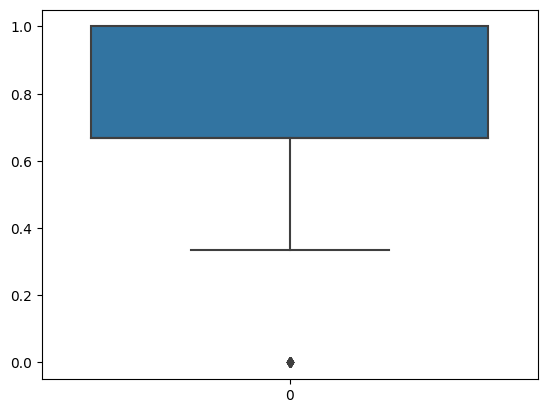

In [23]:
sns.boxplot(data['Chest pain type'])

<Axes: >

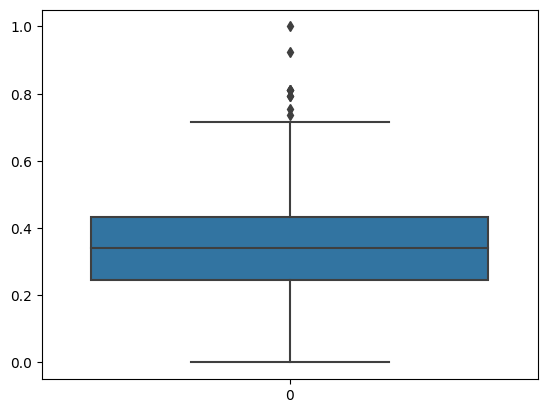

In [24]:
sns.boxplot(data['BP'])

<Axes: >

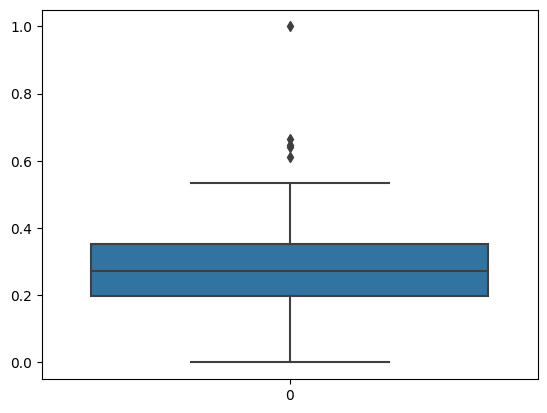

In [25]:
sns.boxplot(data['Cholesterol'])

<Axes: >

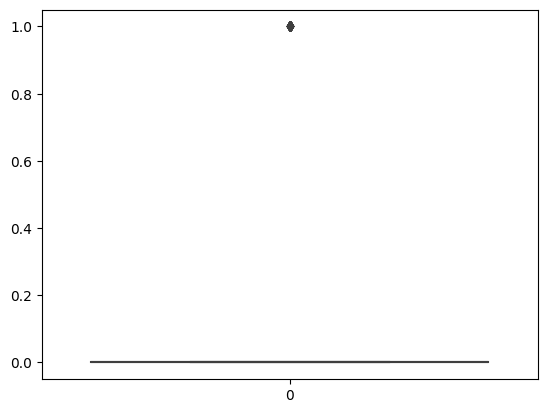

In [26]:
sns.boxplot(data['FBS over 120'])

<Axes: >

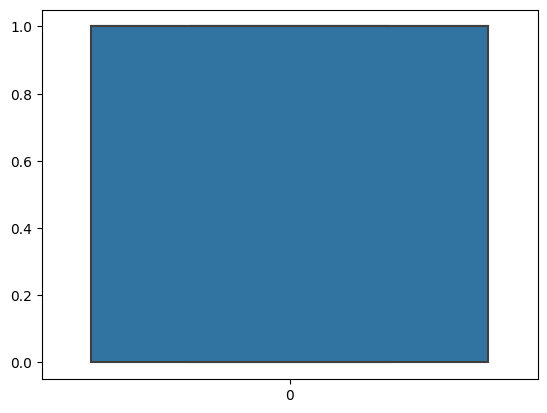

In [27]:
sns.boxplot(data['EKG results'])

<Axes: >

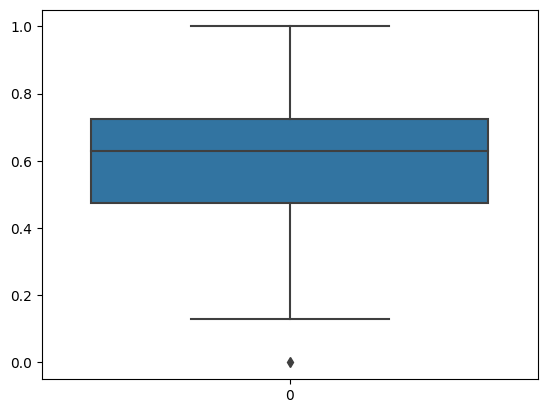

In [28]:
sns.boxplot(data['Max HR'])

<Axes: >

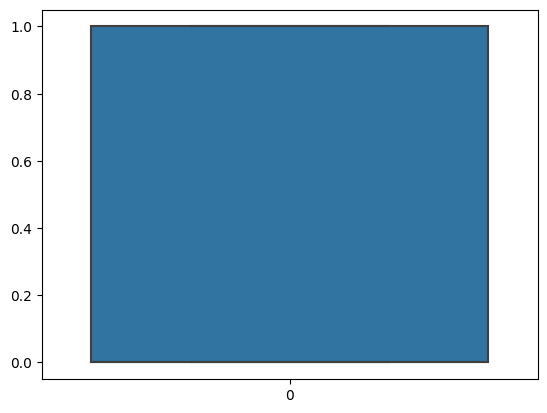

In [29]:
sns.boxplot(data['Exercise angina'])

<Axes: >

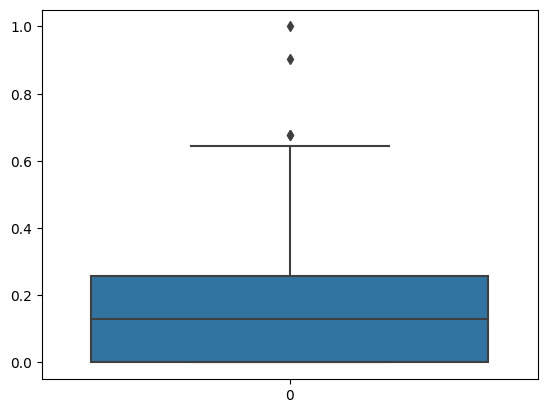

In [30]:
sns.boxplot(data['ST depression'])

<Axes: >

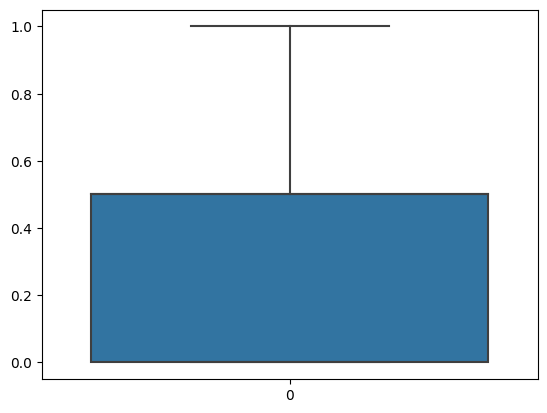

In [31]:
sns.boxplot(data['Slope of ST'])

<Axes: >

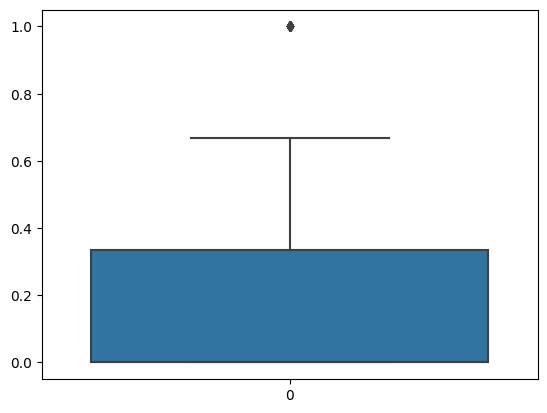

In [32]:
sns.boxplot(data['Number of vessels fluro'])

<Axes: >

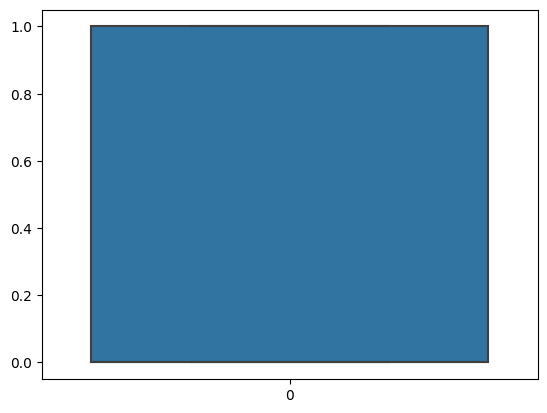

In [33]:
sns.boxplot(data['Thallium'])

**Replace Outliers with upper whisker and lower whisker**

In [34]:
Q1 = data['Chest pain type'].quantile(0.25)
Q3 = data['Chest pain type'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)

In [35]:
data['Chest pain type'] = np.where(data['Chest pain type'] > upper_whisker,upper_whisker,np.where(data['Chest pain type'] < lower_whisker,lower_whisker,data['Chest pain type']))

In [36]:
Q1 = data['BP'].quantile(0.25)
Q3 = data['BP'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)

In [37]:
data['BP']=np.where(data['BP']>upper_whisker,upper_whisker,np.where(data['BP']<lower_whisker,lower_whisker,data['BP']))

In [38]:
Q1 = data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)

In [39]:
data['Cholesterol']=np.where(data['Cholesterol']>upper_whisker,upper_whisker,np.where(data['Cholesterol']<lower_whisker,lower_whisker,data['Cholesterol']))

In [40]:
Q1 = data['FBS over 120'].quantile(0.25)
Q3 = data['FBS over 120'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)

In [41]:
data['FBS over 120']=np.where(data['FBS over 120']>upper_whisker,upper_whisker,np.where(data['FBS over 120']<lower_whisker,lower_whisker,data['FBS over 120']))

In [42]:
Q1 = data['Max HR'].quantile(0.25)
Q3 = data['Max HR'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)

In [43]:
data['Max HR']=np.where(data['Max HR']>upper_whisker,upper_whisker,np.where(data['Max HR']<lower_whisker,lower_whisker,data['Max HR']))

In [44]:
Q1 = data['ST depression'].quantile(0.25)
Q3 = data['ST depression'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)

In [45]:
data['ST depression']=np.where(data['ST depression']>upper_whisker,upper_whisker,np.where(data['ST depression']<lower_whisker,lower_whisker,data['ST depression']))

In [46]:
Q1 = data['Number of vessels fluro'].quantile(0.25)
Q3 = data['Number of vessels fluro'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)

In [47]:
data['Number of vessels fluro']=np.where(data['Number of vessels fluro']>upper_whisker,upper_whisker,np.where(data['Number of vessels fluro']<lower_whisker,lower_whisker,data['Number of vessels fluro']))

                                Heart Disease_Yes  Heart Disease_No
id                                      -0.004016          0.004016
Age                                      0.203895         -0.203895
Chest pain type                          0.438786         -0.438786
BP                                       0.148423         -0.148423
Cholesterol                              0.140027         -0.140027
FBS over 120                                  NaN               NaN
EKG results                              0.182091         -0.182091
Max HR                                  -0.418912          0.418912
Exercise angina                          0.419303         -0.419303
ST depression                            0.423946         -0.423946
Slope of ST                              0.337616         -0.337616
Number of vessels fluro                  0.465944         -0.465944
Thallium                                 0.525020         -0.525020
smoking_status_Unknown                  -0.01269

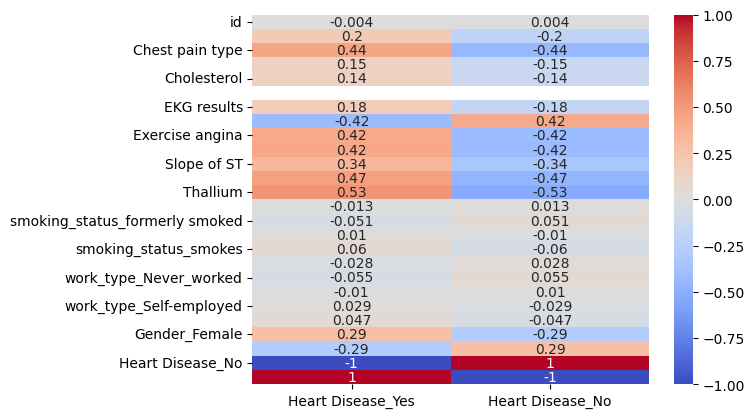

In [48]:
corr_matrix = data.corr(method='pearson')[['Heart Disease_Yes', 'Heart Disease_No']]

# print the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

print(corr_matrix)

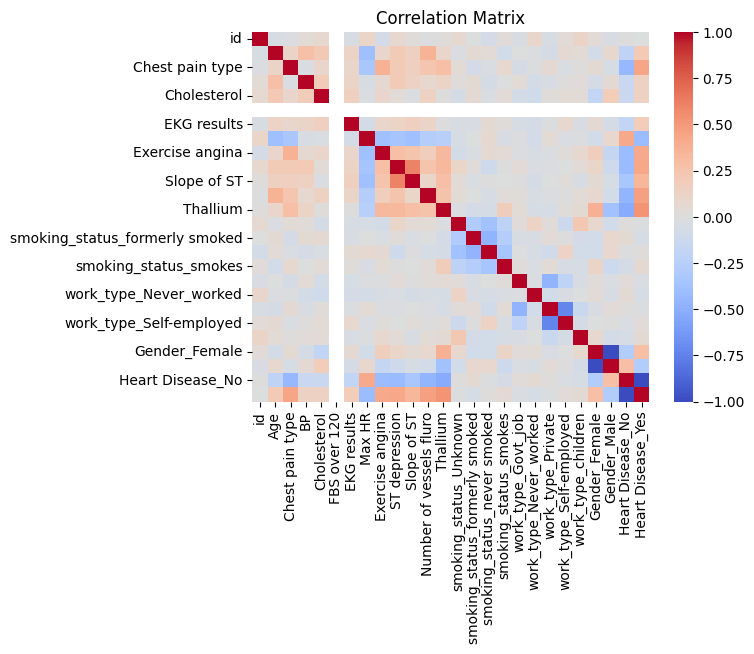

In [49]:
corr_matrix = data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

****

**Delete columns with small coronation**

In [50]:
# drop columns with correlation less than absolute (0.2)
data = data.drop('id', axis=1)
data = data.drop('BP', axis=1)
data = data.drop('Cholesterol', axis=1)
data = data.drop('FBS over 120', axis=1)
data = data.drop('smoking_status_Unknown', axis=1)
data = data.drop('smoking_status_formerly smoked', axis=1)
data = data.drop('smoking_status_never smoked', axis=1)
data = data.drop('smoking_status_smokes', axis=1)
data = data.drop('work_type_Govt_job', axis=1)
data = data.drop('work_type_Never_worked', axis=1)
data = data.drop('work_type_Private', axis=1)
data = data.drop('work_type_Self-employed', axis=1)
data = data.drop('work_type_children', axis=1)
data = data.drop('Heart Disease_No', axis=1)
data = data.drop('Gender_Male', axis=1)

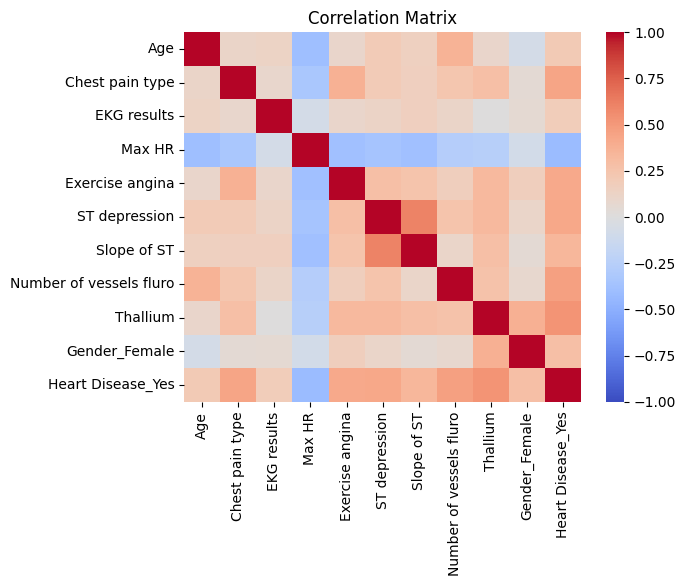

In [51]:
corr_matrix = data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [52]:
data.head()

,Age,Chest pain type,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Gender_Female,Heart Disease_Yes
0,0.854167,1.000000,1.0,0.290076,0.0,0.387097,0.5,0.833333,0.0,True,True
1,0.791667,0.666667,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.0,False,False
2,0.583333,0.333333,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.0,True,True
3,0.729167,1.000000,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.0,True,False
4,0.937500,0.333333,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.0,False,False


**split the data to features and predictions**

In [53]:
x = data.drop(['Heart Disease_Yes'], axis = 1)
y = data['Heart Disease_Yes']

split the data to train and test

In [54]:
# split 20% to test and 80% to train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [55]:

# Create a Logistic Regression object
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(x_train, y_train)

LogisticRegression()

In [56]:
y_pred = logreg.predict(x_test)

In [57]:

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
mse = mean_squared_error(y_test.astype('int'), y_pred.astype('int'))
print("Mean Squared Error: ", mse)


Accuracy: 0.8703703703703703
Classification Report: 
               precision    recall  f1-score   support

       False       0.86      0.94      0.90        33
        True       0.89      0.76      0.82        21

    accuracy                           0.87        54
   macro avg       0.88      0.85      0.86        54
weighted avg       0.87      0.87      0.87        54

Confusion Matrix: 
 [[31  2]
 [ 5 16]]
Mean Squared Error:  0.12962962962962962


In [58]:
# c is hyperparameter determime the penalty for misclassifying data
#  A larger value of C results in a narrower margin, which may reduce misclassifications but can also lead to overfitting.
svm = SVC(kernel='linear', C=1, random_state=42)

In [59]:
svm.fit(x_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [60]:
y_pred = svm.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
mse = mean_squared_error(y_test.astype('int'), y_pred.astype('int'))
print("Mean Squared Error: ", mse)


Accuracy: 0.9259259259259259
Classification Report: 
               precision    recall  f1-score   support

       False       0.89      1.00      0.94        33
        True       1.00      0.81      0.89        21

    accuracy                           0.93        54
   macro avg       0.95      0.90      0.92        54
weighted avg       0.93      0.93      0.92        54

Confusion Matrix: 
 [[33  0]
 [ 4 17]]
Mean Squared Error:  0.07407407407407407


In [62]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

In [63]:
# Fit the decision tree to the data
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)


In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
mse = mean_squared_error(y_test.astype('int'), y_pred.astype('int'))
print("Mean Squared Error: ", mse)

Accuracy: 0.8148148148148148
Classification Report: 
               precision    recall  f1-score   support

       False       0.83      0.88      0.85        33
        True       0.79      0.71      0.75        21

    accuracy                           0.81        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.81      0.81      0.81        54

Confusion Matrix: 
 [[29  4]
 [ 6 15]]
Mean Squared Error:  0.18518518518518517
